# **題目**

114-1機器學習在教育上的應用期末作業
主題：教育數據的問題定義與模型分析
 報告要求：
 1. 專題題目與動機
 2. 資料來源與取得方式（資料從哪裡？用什麼方式收集？）
 3. 分析流程示意圖（用架構圖的方式呈現）
 4. 資料欄位說明與資料探索
 5. 定義一個監督式學習問題且用適合模型分析
 6. 定義一個非監督式學習問題且用適合模型分析
 7. 實驗結果與觀察（過程中學到什麼？遇到最大的困難？）
 ※ 以上內容用 PPT 格式匯出，轉成 「PDF 格式」上傳，並將程式碼上傳到 Github 後附上網址（請附在PDF的最後一頁）。

專題題目與動機 : 想知道串流平台的使用率 以及現代人的接受度

資料來源與取得方式 : kaggle datasets

Global Streaming Services Dataset : https://www.kaggle.com/datasets/sureshkumarpalus/global-streaming-services-dataset

# **顯示表格**

In [1]:
!pip -q install -U "kagglehub[pandas-datasets]"

In [2]:
import os
import kagglehub
import pandas as pd

handle = "sureshkumarpalus/global-streaming-services-dataset"

# 2) 先下載整包（不指定檔案）
dataset_dir = kagglehub.dataset_download(handle)
print("dataset_dir =", dataset_dir)

# 3) 列出有哪些檔案（看清楚真正檔名）
print("files =", os.listdir(dataset_dir))

100%|██████████| 12.9k/12.9k [00:00<00:00, 19.6MB/s]

Extracting files...
dataset_dir = /root/.cache/kagglehub/datasets/sureshkumarpalus/global-streaming-services-dataset/versions/3
files = ['paid_video_streaming_services.csv', 'paid_video_market_summary.csv', 'paid_video_growth_predictions.csv', 'free_video_streaming_services.csv']


**paid video growth predictions 付費影片成長預測 :**

| 欄位名稱（英文）                    | 中文名稱    | 資料型態 | 數值範圍／類型             | 欄位說明                                 |
| --------------------------- | ------- | ---- | ------------------- | ------------------------------------ |
| `current_subscribers`       | 目前訂閱用戶數 | 數值   | ≥ 0（百萬人）            | 平台目前實際擁有的訂閱用戶規模                      |
| `predicted_subscribers`     | 預測訂閱用戶數 | 數值   | ≥ 0（百萬人）            | 根據模型推估之未來訂閱用戶數                       |
| `growth_rate`               | 成長率     | 數值   | -1 ~ +1（比例）         | 訂閱用戶的相對成長率（可為負）                      |
| `projected_growth`          | 預估成長量   | 數值   | 可正可負                | 預測期間內用戶數的淨增減量                        |
| `predicted_arpu`            | 預測 ARPU | 數值   | ≥ 0（USD）            | 預測每位用戶平均營收（Average Revenue Per User） |
| `predicted_monthly_revenue` | 預測月營收   | 數值   | ≥ 0（USD）            | 根據預測用戶數與 ARPU 推估之月營收                 |
| `service_name`              | 平台名稱    | 類別   | 字串                  | 串流服務品牌名稱                             |
| `type`                      | 平台類型    | 類別   | Paid / Hybrid       | 平台商業模式分類                             |
| `engagement_cluster`        | 使用者互動群集 | 類別   | Low / Medium / High | 依使用頻率與黏著度分群之標籤                       |


In [3]:
csv_path_0 = os.path.join(dataset_dir, "paid_video_growth_predictions.csv")
df0 = pd.read_csv(csv_path_0)
# print(df0.shape)
print(df0.columns)
# df0.head()
print(df0.head(1))

Index(['current_subscribers', 'predicted_subscribers', 'growth_rate',
       'projected_growth', 'predicted_arpu', 'predicted_monthly_revenue',
       'service_name', 'type', 'engagement_cluster'],
      dtype='object')
   current_subscribers  predicted_subscribers  growth_rate  projected_growth  \
0                301.6             364.606406     0.038672         63.006406   

   predicted_arpu  predicted_monthly_revenue service_name type  \
0       19.652638                7165.477819      Netflix  VOD   

  engagement_cluster  
0    High Engagement  


**paid video market summary 付費視訊市場概覽 :**

| 欄位名稱（英文） | 中文名稱   | 資料型態 | 數值範圍／類型 | 欄位說明                |
| -------- | ------ | ---- | ------- | ------------------- |
| `metric` | 市場指標名稱 | 類別   | 字串      | 市場統計指標的名稱（如總用戶、營收等） |
| `value`  | 指標數值   | 數值   | 依指標而定   | 對應指標的實際或估計數值        |


In [4]:
csv_path_1 = os.path.join(dataset_dir, "paid_video_market_summary.csv")
df1 = pd.read_csv(csv_path_1)
print(df1.shape)
print(df1.columns)
df1.head()

(8, 2)
Index(['metric', 'value'], dtype='object')


,metric,value
0,Total Services,78
1,Total Subscribers (M),2071.0
2,Total Monthly Revenue (M USD),19646.5
3,Average ARPU (USD),12.86
4,Average Churn Rate (%),2.51


**free video streaming services 免費視訊串流服務 :**

| 欄位名稱（英文）               | 中文名稱   | 資料型態 | 數值範圍／類型               | 欄位說明        |
| ---------------------- | ------ | ---- | --------------------- | ----------- |
| `service_name`         | 平台名稱   | 類別   | 字串                    | 免費影音串流服務名稱  |
| `type`                 | 平台類型   | 類別   | Free / Hybrid         | 商業模式分類      |
| `category`             | 平台分類   | 類別   | Streaming / OTT       | 平台服務型態      |
| `countries_available`  | 可用國家數  | 數值   | ≥ 0                   | 平台提供服務的國家數量 |
| `monthly_price_usd`    | 月費（美元） | 數值   | 0                     | 免費平台通常為 0   |
| `annual_price_usd`     | 年費（美元） | 數值   | 0                     | 免費平台通常為 0   |
| `launch_year`          | 上線年份   | 數值   | 1990 ~ 2025           | 平台成立或上線年份   |
| `subscribers_millions` | 用戶數    | 數值   | ≥ 0（百萬人）              | 平均活躍用戶規模    |
| `content_type`         | 內容類型   | 類別   | Movies / TV / Mixed   | 平台主要內容形式    |
| `platforms`            | 支援平台   | 類別   | Android / iOS / Web 等 | 可使用之裝置平台    |
| `is_free`              | 是否免費   | 類別   | True / False          | 是否為免費服務     |
| `parent_company`       | 母公司    | 類別   | 字串                    | 所屬企業集團      |

年齡分布（百分比，總和≈100%） :

| 欄位                      | 中文名稱      | 說明       |
| ----------------------- | --------- | -------- |
| `age_group_18_24_pct`   | 18–24 歲比例 | 年輕族群使用占比 |
| `age_group_25_34_pct`   | 25–34 歲比例 | 青壯年族群    |
| `age_group_35_44_pct`   | 35–44 歲比例 | 中壯年族群    |
| `age_group_45_54_pct`   | 45–54 歲比例 | 成熟族群     |
| `age_group_55_64_pct`   | 55–64 歲比例 | 中高齡族群    |
| `age_group_65_plus_pct` | 65 歲以上比例  | 高齡族群     |

裝置使用比例（百分比，總和≈100%）:

| 欄位                          | 中文名稱         | 說明        |
| --------------------------- | ------------ | --------- |
| `device_android_pct`        | Android 裝置比例 | 行動裝置使用率   |
| `device_ios_pct`            | iOS 裝置比例     | 蘋果生態系     |
| `device_web_pct`            | 網頁端比例        | 桌機 / 筆電   |
| `device_smart_tv_pct`       | 智慧電視比例       | 客廳觀看      |
| `device_gaming_console_pct` | 遊戲主機比例       | Xbox / PS |
| `device_other_pct`          | 其他裝置比例       | 其餘設備      |

營運指標 :

| 欄位                          | 中文名稱     | 說明       |
| --------------------------- | -------- | -------- |
| `engagement_cluster`        | 使用者互動群集  | 依使用黏著度分群 |
| `arpu_usd`                  | ARPU（美元） | 平均每用戶營收  |
| `churn_rate_pct`            | 流失率      | 用戶取消比例   |
| `subscribers_2020_millions` | 2020 用戶數 | 歷史用戶資料   |
| `subscribers_2021_millions` | 2021 用戶數 | 同上       |
| `subscribers_2022_millions` | 2022 用戶數 | 同上       |
| `subscribers_2023_millions` | 2023 用戶數 | 同上       |
| `subscribers_2024_millions` | 2024 用戶數 | 同上       |


In [5]:
csv_path_2 = os.path.join(dataset_dir, "free_video_streaming_services.csv")
df2 = pd.read_csv(csv_path_2)
print(df2.shape)
# print(df2.columns)
# df2.head(1)
col = ['service_name', 'type', 'category', 'countries_available',
       'monthly_price_usd', 'annual_price_usd', 'launch_year',
       'subscribers_millions', 'content_type', 'platforms', 'is_free',
       'parent_company', 'age_group_18_24_pct', 'age_group_25_34_pct',
       'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
       'age_group_65_plus_pct', 'device_android_pct', 'device_ios_pct',
       'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct', 'engagement_cluster', 'arpu_usd', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions']
print(df2[col].iloc[1])
# print(df2["parent_company"].iloc[:5])

(35, 32)
service_name                                    Bilibili
type                                            Regional
category                                       Free/Paid
countries_available                        China, Global
monthly_price_usd                                    0.0
annual_price_usd                                     0.0
launch_year                                         2009
subscribers_millions                               200.0
content_type                 Anime, User Content, Gaming
platforms                          Web, Mobile, Smart TV
is_free                                             True
parent_company                                  Bilibili
age_group_18_24_pct                                 13.9
age_group_25_34_pct                                 32.7
age_group_35_44_pct                                 16.4
age_group_45_54_pct                                 18.5
age_group_55_64_pct                                 10.0
age_group_65_plus_pct 

**paid video streaming services 付費視訊串流服務 :**

**欄位結構與 free 類似，差異在於「價格與付費行為」**

| 欄位                          | 中文名稱   | 說明            |
| --------------------------- | ------ | ------------- |
| `monthly_price_usd`         | 月費（美元） | 訂閱制月費         |
| `annual_price_usd`          | 年費（美元） | 年繳方案          |
| `is_free`                   | 是否免費   | 付費平台通常為 False |
| `arpu_usd`                  | ARPU   | 核心營收指標        |
| `churn_rate_pct`            | 用戶流失率  | 衡量平台穩定度       |
| `subscribers_20xx_millions` | 歷史訂閱數  | 成長趨勢分析        |


In [6]:
csv_path_3 = os.path.join(dataset_dir, "paid_video_streaming_services.csv")
df3 = pd.read_csv(csv_path_3)
print(df3.shape)
print(df3.columns)
# df3.head()
col = ['age_group_18_24_pct', 'age_group_25_34_pct',
       'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
       'age_group_65_plus_pct']
print(df3[col].iloc[:5])
col = ['device_android_pct', 'device_ios_pct',
       'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct']
print(df3[col].iloc[:5])
# print(df3["age_group_18_24_pct"].iloc[:5])

(78, 32)
Index(['service_name', 'type', 'category', 'countries_available',
       'monthly_price_usd', 'annual_price_usd', 'launch_year',
       'subscribers_millions', 'content_type', 'platforms', 'is_free',
       'parent_company', 'age_group_18_24_pct', 'age_group_25_34_pct',
       'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
       'age_group_65_plus_pct', 'device_android_pct', 'device_ios_pct',
       'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct', 'engagement_cluster', 'arpu_usd', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions'],
      dtype='object')
   age_group_18_24_pct  age_group_25_34_pct  age_group_35_44_pct  \
0                 13.9                 34.3                 18.3   
1                  8.8                 32.6                 19.0   
2                 24.6 

# **檢查空格**

In [7]:
import pandas as pd
import numpy as np

def check_missing(df):
    print("NaN 數量：")
    print(df.isna().sum())

    print("\n空字串數量：")
    print((df == "").sum())

In [8]:
check_missing(df0)
print()
print('=================================')
print()
check_missing(df1)
print()
print('=================================')
print()
check_missing(df2)
print()
print('=================================')
print()
check_missing(df3)

NaN 數量：
current_subscribers          0
predicted_subscribers        0
growth_rate                  0
projected_growth             0
predicted_arpu               0
predicted_monthly_revenue    0
service_name                 0
type                         0
engagement_cluster           0
dtype: int64

空字串數量：
current_subscribers          0
predicted_subscribers        0
growth_rate                  0
projected_growth             0
predicted_arpu               0
predicted_monthly_revenue    0
service_name                 0
type                         0
engagement_cluster           0
dtype: int64


NaN 數量：
metric    0
value     0
dtype: int64

空字串數量：
metric    0
value     0
dtype: int64


NaN 數量：
service_name                 0
type                         0
category                     0
countries_available          0
monthly_price_usd            0
annual_price_usd             0
launch_year                  0
subscribers_millions         0
content_type                 0
platforms          

In [9]:
def fill_missing_values(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # 數值型 → 平均值
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)
        else:
            # 類別型 → 眾數（最常出現字串）
            if df[col].mode().empty:
                df[col] = df[col].fillna("Unknown")
            else:
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
    return df

In [10]:
df0 = fill_missing_values(df0)
df1 = fill_missing_values(df1)
df2 = fill_missing_values(df2)
df3 = fill_missing_values(df3)

In [11]:
print("補值後 NaN 總數：", df0.isna().sum().sum())
print("補值後 NaN 總數：", df1.isna().sum().sum())
print("補值後 NaN 總數：", df2.isna().sum().sum())
print("補值後 NaN 總數：", df3.isna().sum().sum())

補值後 NaN 總數： 0
補值後 NaN 總數： 0
補值後 NaN 總數： 0
補值後 NaN 總數： 0


# **字串轉文字**

In [12]:
import pandas as pd
import numpy as np

def encode_categorical_with_check_table(df, cols):
    """
    將指定的類別欄位（字串）轉成整數代碼，並輸出對應表 check_table
    - 空白/空格 -> NaN
    - NaN 用眾數補
    - 類別依字母排序編碼為 0..K-1（可重現）
    """
    df = df.copy()

    # 1) 空白字串/純空格 -> NaN
    for c in cols:
        df[c] = df[c].replace(r'^\s*$', np.nan, regex=True)

    # 2) 用眾數補 NaN（若整欄都是 NaN，則補 "Unknown"）
    for c in cols:
        if df[c].dropna().empty:
            df[c] = df[c].fillna("Unknown")
        else:
            df[c] = df[c].fillna(df[c].mode(dropna=True)[0])

    # 3) 建立 mapping + 編碼
    mapping_records = []
    for c in cols:
        categories = sorted(df[c].astype(str).unique())  # 固定排序，確保每次一致
        mapping = {cat: idx for idx, cat in enumerate(categories)}
        df[c] = df[c].astype(str).map(mapping).astype(int)

        for cat, idx in mapping.items():
            mapping_records.append({
                "column": c,
                "code": idx,
                "category_en": cat,   # 原始字串（英文）
                "category_zh": cat    # 先暫用同字串；若你要我幫你翻中文我也可以再補
            })

    check_table = pd.DataFrame(mapping_records).sort_values(["column", "code"]).reset_index(drop=True)
    return df, check_table

In [13]:
def countries_to_count(val, global_count=200):
    if pd.isna(val):
        return np.nan

    val = str(val).strip()

    # 情況 1：Global
    if val.lower() == "global":
        return global_count

    # 情況 2：用逗號分隔的國家清單
    if "," in val:
        return len([c for c in val.split(",") if c.strip() != ""])

    # 情況 3：單一國家
    return 1

In [14]:
def multi_hot_encode(df, col, sep=","):
    """
    將含多類別的字串欄位轉成多個 0/1 欄位
    """
    # 填補 NaN 為空字串
    s = df[col].fillna("")

    # 切割並清理
    s = s.apply(lambda x: [i.strip() for i in x.split(sep) if i.strip() != ""])

    # 取得所有可能類別
    unique_items = sorted(set(item for sublist in s for item in sublist))

    # 建立 multi-hot 欄位
    for item in unique_items:
        df[f"{col}_{item.replace(' ', '_').lower()}"] = s.apply(lambda lst: int(item in lst))

    return df, unique_items

**df0 => df_encoded_0**

In [15]:
cols_to_encode_0 = ["type", "engagement_cluster"]
df_encoded_0, check_table_0 = encode_categorical_with_check_table(df0, cols_to_encode_0)

print(df_encoded_0.head())
print("\ncheck_table:")
print(check_table_0)

   current_subscribers  predicted_subscribers  growth_rate  projected_growth  \
0                301.6             364.606406     0.038672         63.006406   
1                220.0             265.959580     0.038672         45.959580   
2                131.6             208.667479     0.096579         77.067479   
3                128.0             202.864528     0.096476         74.864528   
4                125.0             170.822276     0.064454         45.822276   

   predicted_arpu  predicted_monthly_revenue        service_name  type  \
0       19.652638                7165.477819             Netflix     5   
1        9.163871                2437.219194  Amazon Prime Video     5   
2       12.321542                2571.105063             Disney+     5   
3       16.020212                3249.932843       Max (HBO Max)     5   
4        2.903733                 496.022197               iQiyi     2   

   engagement_cluster  
0                   0  
1                   0  
2 

**df1 => df_encoded_1**

In [16]:
df_encoded_1 = df1.copy()

**df2 => df_encoded_2**

In [17]:
cols_to_encode_2 = ["type", "category", "is_free", "engagement_cluster"]
df_encoded_2, check_table_2 = encode_categorical_with_check_table(df2, cols_to_encode_2)

df_encoded_2["countries_count"] = df_encoded_2["countries_available"].apply(countries_to_count)
# print(df_encoded_2["countries_count"][:5])
df_encoded_2["content_type_count"] = df_encoded_2["content_type"].apply(countries_to_count)
# print(df_encoded_2["content_type_count"][:5])

df_encoded_2, platform_list_2 = multi_hot_encode(df_encoded_2, "platforms")

In [18]:
print("\ncheck_table:")
print(check_table_2)


check_table:
               column  code        category_en        category_zh
0            category     0               Free               Free
1            category     1          Free/Paid          Free/Paid
2  engagement_cluster     0    High Engagement    High Engagement
3  engagement_cluster     1     Low Engagement     Low Engagement
4  engagement_cluster     2  Medium Engagement  Medium Engagement
5             is_free     0               True               True
6                type     0     Free Streaming     Free Streaming
7                type     1           Regional           Regional


In [19]:
print(df_encoded_2.shape)
print(platform_list_2)
df_encoded_2.head()

(35, 39)
['Gaming Consoles', 'Mobile', 'Roku', 'Smart TV', 'Web']


,service_name,type,category,countries_available,monthly_price_usd,annual_price_usd,launch_year,subscribers_millions,content_type,platforms,...,subscribers_2022_millions,subscribers_2023_millions,subscribers_2024_millions,countries_count,content_type_count,platforms_gaming_consoles,platforms_mobile,platforms_roku,platforms_smart_tv,platforms_web
0,MX Player,1,1,"India, Global",0.0,0.0,2011,300.0,"Movies, TV Shows, Music","Web, Mobile, Smart TV",...,247.9,272.7,300.0,2,3,0,1,0,1,1
1,Bilibili,1,1,"China, Global",0.0,0.0,2009,200.0,"Anime, User Content, Gaming","Web, Mobile, Smart TV",...,165.3,181.8,200.0,2,3,0,1,0,1,1
2,The Roku Channel,0,0,"US, UK, Canada",0.0,0.0,2017,100.0,"Movies, TV Shows, Live TV","Web, Mobile, Smart TV, Roku",...,82.6,90.9,100.0,3,3,0,1,1,1,1
3,Pluto TV,0,0,"US, UK, Canada, Latin America, Europe",0.0,0.0,2013,90.0,"Movies, TV Shows, Live TV","Web, Mobile, Smart TV, Gaming Consoles",...,74.4,81.8,90.0,5,3,1,1,0,1,1
4,Tubi,0,0,"US, Canada, UK, Australia, Mexico",0.0,0.0,2014,80.0,"Movies, TV Shows","Web, Mobile, Smart TV, Gaming Consoles",...,66.1,72.7,80.0,5,2,1,1,0,1,1


**df3 => df_encoded_3**

In [20]:
cols_to_encode_3 = ["type", "category", "is_free", "engagement_cluster"]
df_encoded_3, check_table_3 = encode_categorical_with_check_table(df3, cols_to_encode_3)

df_encoded_3["countries_count"] = df_encoded_3["countries_available"].apply(countries_to_count)
# print(df_encoded_3["countries_count"][:5])
df_encoded_3["content_type_count"] = df_encoded_3["content_type"].apply(countries_to_count)
# print(df_encoded_3["content_type_count"][:5])

df_encoded_3, platform_list_3 = multi_hot_encode(df_encoded_3, "platforms")

In [21]:
print("\ncheck_table:")
print(check_table_3)


check_table:
                column  code        category_en        category_zh
0             category     0               Paid               Paid
1   engagement_cluster     0    High Engagement    High Engagement
2   engagement_cluster     1     Low Engagement     Low Engagement
3   engagement_cluster     2  Medium Engagement  Medium Engagement
4              is_free     0              False              False
5                 type     0            Live TV            Live TV
6                 type     1          Music/VOD          Music/VOD
7                 type     2           Regional           Regional
8                 type     3          Specialty          Specialty
9                 type     4             Sports             Sports
10                type     5                VOD                VOD


In [22]:
print(df_encoded_3.shape)
print(platform_list_3)
df_encoded_3.head()

(78, 38)
['Gaming Consoles', 'Mobile', 'Smart TV', 'Web']


,service_name,type,category,countries_available,monthly_price_usd,annual_price_usd,launch_year,subscribers_millions,content_type,platforms,...,subscribers_2021_millions,subscribers_2022_millions,subscribers_2023_millions,subscribers_2024_millions,countries_count,content_type_count,platforms_gaming_consoles,platforms_mobile,platforms_smart_tv,platforms_web
0,Netflix,5,0,Global (190+ countries),15.99,191.88,1997,301.6,"Movies, TV Shows, Originals","Web, Mobile, Smart TV, Gaming Consoles",...,239.4,258.6,279.3,301.6,1,3,1,1,1,1
1,Amazon Prime Video,5,0,Global (200+ countries),8.99,107.88,2006,220.0,"Movies, TV Shows, Originals","Web, Mobile, Smart TV, Gaming Consoles",...,174.6,188.6,203.7,220.0,1,3,1,1,1,1
2,Disney+,5,0,Global (100+ countries),10.99,109.99,2019,131.6,"Movies, TV Shows, Disney Content","Web, Mobile, Smart TV, Gaming Consoles",...,67.4,84.2,105.3,131.6,1,3,1,1,1,1
3,Max (HBO Max),5,0,"US, Latin America, Europe, Asia",15.99,149.99,2020,128.0,"Movies, TV Shows, HBO Originals","Web, Mobile, Smart TV, Gaming Consoles",...,65.5,81.9,102.4,128.0,4,3,1,1,1,1
4,iQiyi,2,0,"China, Southeast Asia, Global",2.99,29.99,2010,125.0,"Movies, TV Shows, Originals","Web, Mobile, Smart TV",...,99.2,107.2,115.7,125.0,3,3,0,1,1,1


# **正規化 標準化**

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def preprocess_fill_and_scale(
    df: pd.DataFrame,
    percent_cols=None,          # 需要 /100 的欄位（*_pct）
    minmax_cols=None,           # 需要 MinMax 的欄位
    standard_cols=None,         # 需要 Standard 的欄位
    verbose: bool = True
):
    df = df.copy()

    percent_cols  = percent_cols  or []
    minmax_cols   = minmax_cols   or []
    standard_cols = standard_cols or []

    # ---------- (4) 百分比欄位：/100 -> 0~1 ----------
    for c in percent_cols:
        if c in df.columns:
            # 假設原本是 0~100（%）
            df[c] = df[c] / 100.0

    # ---------- (5) MinMax / Standard 縮放（只做你指定的欄位） ----------
    scalers = {}

    # MinMax
    mm_cols = [c for c in minmax_cols if c in df.columns]
    if mm_cols:
        mm = MinMaxScaler()
        df[mm_cols] = mm.fit_transform(df[mm_cols])
        scalers["minmax"] = {"scaler": mm, "cols": mm_cols}

    # Standard
    ss_cols = [c for c in standard_cols if c in df.columns]
    if ss_cols:
        ss = StandardScaler()
        df[ss_cols] = ss.fit_transform(df[ss_cols])
        scalers["standard"] = {"scaler": ss, "cols": ss_cols}

    if verbose:
        total_nan = int(df.isna().sum().sum())
        print(f"[OK] preprocess done. remaining NaN total = {total_nan}")
        if "minmax" in scalers:
            print("  MinMax cols:", scalers["minmax"]["cols"])
        if "standard" in scalers:
            print("  Standard cols:", scalers["standard"]["cols"])
        if percent_cols:
            print("  Percent(/100) cols:", [c for c in percent_cols if c in df.columns])

    return df, scalers

In [24]:
# ============================================================
# 你可以直接套用：1) paid_video_growth_predictions
# ============================================================
growth_minmax = [
    "current_subscribers",
    "predicted_subscribers",
    "projected_growth",
    "predicted_arpu",
    "predicted_monthly_revenue",
]
growth_standard = ["growth_rate"]  # 若你用樹模型可不做，想保守就留著標準化
growth_percent = []               # 這張表沒有 *_pct

# df_growth 是你讀入 paid_video_growth_predictions.csv 的 dataframe
df_encoded_0, growth_scalers = preprocess_fill_and_scale(
    df_encoded_0,
    percent_cols=growth_percent,
    minmax_cols=growth_minmax,
    standard_cols=growth_standard,
    verbose=True
)

# ============================================================
# 你可以直接套用：2) free/paid_video_streaming_services（兩張欄位相同）
# ============================================================
stream_minmax = [
    "monthly_price_usd",
    "annual_price_usd",
    "subscribers_millions",
    "arpu_usd",
    "subscribers_2020_millions",
    "subscribers_2021_millions",
    "subscribers_2022_millions",
    "subscribers_2023_millions",
    "subscribers_2024_millions",
]
stream_standard = ["launch_year"]  # 年份建議用 Z-score
stream_percent = [
    "age_group_18_24_pct",
    "age_group_25_34_pct",
    "age_group_35_44_pct",
    "age_group_45_54_pct",
    "age_group_55_64_pct",
    "age_group_65_plus_pct",
    "device_android_pct",
    "device_ios_pct",
    "device_web_pct",
    "device_smart_tv_pct",
    "device_gaming_console_pct",
    "device_other_pct",
    "churn_rate_pct",
]

# df_free 是你讀入 free_video_streaming_services.csv 的 dataframe
df_encoded_2, free_scalers = preprocess_fill_and_scale(
    df_encoded_2,
    percent_cols=stream_percent,
    minmax_cols=stream_minmax,
    standard_cols=stream_standard,
    verbose=True
)

# df_paid 是你讀入 paid_video_streaming_services.csv 的 dataframe
df_encoded_3, paid_scalers = preprocess_fill_and_scale(
    df_encoded_3,
    percent_cols=stream_percent,
    minmax_cols=stream_minmax,
    standard_cols=stream_standard,
    verbose=True
)

[OK] preprocess done. remaining NaN total = 0
  MinMax cols: ['current_subscribers', 'predicted_subscribers', 'projected_growth', 'predicted_arpu', 'predicted_monthly_revenue']
  Standard cols: ['growth_rate']
[OK] preprocess done. remaining NaN total = 0
  MinMax cols: ['monthly_price_usd', 'annual_price_usd', 'subscribers_millions', 'arpu_usd', 'subscribers_2020_millions', 'subscribers_2021_millions', 'subscribers_2022_millions', 'subscribers_2023_millions', 'subscribers_2024_millions']
  Standard cols: ['launch_year']
  Percent(/100) cols: ['age_group_18_24_pct', 'age_group_25_34_pct', 'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct', 'age_group_65_plus_pct', 'device_android_pct', 'device_ios_pct', 'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct', 'device_other_pct', 'churn_rate_pct']
[OK] preprocess done. remaining NaN total = 0
  MinMax cols: ['monthly_price_usd', 'annual_price_usd', 'subscribers_millions', 'arpu_usd', 'subscribers_2020_milli

In [25]:
print(growth_scalers)
print(free_scalers)
print(paid_scalers)

{'minmax': {'scaler': MinMaxScaler(), 'cols': ['current_subscribers', 'predicted_subscribers', 'projected_growth', 'predicted_arpu', 'predicted_monthly_revenue']}, 'standard': {'scaler': StandardScaler(), 'cols': ['growth_rate']}}
{'minmax': {'scaler': MinMaxScaler(), 'cols': ['monthly_price_usd', 'annual_price_usd', 'subscribers_millions', 'arpu_usd', 'subscribers_2020_millions', 'subscribers_2021_millions', 'subscribers_2022_millions', 'subscribers_2023_millions', 'subscribers_2024_millions']}, 'standard': {'scaler': StandardScaler(), 'cols': ['launch_year']}}
{'minmax': {'scaler': MinMaxScaler(), 'cols': ['monthly_price_usd', 'annual_price_usd', 'subscribers_millions', 'arpu_usd', 'subscribers_2020_millions', 'subscribers_2021_millions', 'subscribers_2022_millions', 'subscribers_2023_millions', 'subscribers_2024_millions']}, 'standard': {'scaler': StandardScaler(), 'cols': ['launch_year']}}


In [26]:
df_encoded_0.head()

,current_subscribers,predicted_subscribers,growth_rate,projected_growth,predicted_arpu,predicted_monthly_revenue,service_name,type,engagement_cluster
0,1.000000,1.000000,-2.591733,0.662113,0.209733,1.000000,Netflix,5,0
1,0.729443,0.729443,-2.591733,0.482973,0.097797,0.340134,Amazon Prime Video,5,0
2,0.436340,0.572309,0.014531,0.809876,0.131495,0.358818,Disney+,5,0
3,0.424403,0.556393,0.009923,0.786726,0.170967,0.453554,Max (HBO Max),5,0
4,0.414456,0.468511,-1.431345,0.481531,0.030989,0.069224,iQiyi,2,0


In [27]:
df_encoded_2.head()

,service_name,type,category,countries_available,monthly_price_usd,annual_price_usd,launch_year,subscribers_millions,content_type,platforms,...,subscribers_2022_millions,subscribers_2023_millions,subscribers_2024_millions,countries_count,content_type_count,platforms_gaming_consoles,platforms_mobile,platforms_roku,platforms_smart_tv,platforms_web
0,MX Player,1,1,"India, Global",0.0,0.0,-0.125487,1.000000,"Movies, TV Shows, Music","Web, Mobile, Smart TV",...,1.000000,1.000000,1.000000,2,3,0,1,0,1,1
1,Bilibili,1,1,"China, Global",0.0,0.0,-0.524764,0.666667,"Anime, User Content, Gaming","Web, Mobile, Smart TV",...,0.666801,0.666667,0.666667,2,3,0,1,0,1,1
2,The Roku Channel,0,0,"US, UK, Canada",0.0,0.0,1.072344,0.333333,"Movies, TV Shows, Live TV","Web, Mobile, Smart TV, Roku",...,0.333199,0.333333,0.333333,3,3,0,1,1,1,1
3,Pluto TV,0,0,"US, UK, Canada, Latin America, Europe",0.0,0.0,0.273790,0.300000,"Movies, TV Shows, Live TV","Web, Mobile, Smart TV, Gaming Consoles",...,0.300121,0.299963,0.300000,5,3,1,1,0,1,1
4,Tubi,0,0,"US, Canada, UK, Australia, Mexico",0.0,0.0,0.473429,0.266667,"Movies, TV Shows","Web, Mobile, Smart TV, Gaming Consoles",...,0.266640,0.266593,0.266667,5,2,1,1,0,1,1


In [28]:
df_encoded_3.head()

,service_name,type,category,countries_available,monthly_price_usd,annual_price_usd,launch_year,subscribers_millions,content_type,platforms,...,subscribers_2021_millions,subscribers_2022_millions,subscribers_2023_millions,subscribers_2024_millions,countries_count,content_type_count,platforms_gaming_consoles,platforms_mobile,platforms_smart_tv,platforms_web
0,Netflix,5,0,Global (190+ countries),0.199900,0.239853,-2.106507,1.000000,"Movies, TV Shows, Originals","Web, Mobile, Smart TV, Gaming Consoles",...,1.000000,1.000000,1.000000,1.000000,1,3,1,1,1,1
1,Amazon Prime Video,5,0,Global (200+ countries),0.112389,0.134852,-0.934742,0.729443,"Movies, TV Shows, Originals","Web, Mobile, Smart TV, Gaming Consoles",...,0.729323,0.729312,0.729323,0.729443,1,3,1,1,1,1
2,Disney+,5,0,Global (100+ countries),0.137392,0.137489,0.757808,0.436340,"Movies, TV Shows, Disney Content","Web, Mobile, Smart TV, Gaming Consoles",...,0.281537,0.325599,0.377014,0.436340,1,3,1,1,1,1
3,Max (HBO Max),5,0,"US, Latin America, Europe, Asia",0.199900,0.187490,0.888005,0.424403,"Movies, TV Shows, HBO Originals","Web, Mobile, Smart TV, Gaming Consoles",...,0.273601,0.316705,0.366631,0.424403,4,3,1,1,1,1
4,iQiyi,2,0,"China, Southeast Asia, Global",0.037380,0.037488,-0.413957,0.414456,"Movies, TV Shows, Originals","Web, Mobile, Smart TV",...,0.414369,0.414540,0.414250,0.414456,3,3,0,1,1,1


# **ML(監督式學習)**

**題目:預測哪些串流平台為「高互動群集」「中互動群集」「低互動群集」，分析哪些特徵關欄性較大**

In [29]:
print(df_encoded_2.columns)

Index(['service_name', 'type', 'category', 'countries_available',
       'monthly_price_usd', 'annual_price_usd', 'launch_year',
       'subscribers_millions', 'content_type', 'platforms', 'is_free',
       'parent_company', 'age_group_18_24_pct', 'age_group_25_34_pct',
       'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
       'age_group_65_plus_pct', 'device_android_pct', 'device_ios_pct',
       'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct', 'engagement_cluster', 'arpu_usd', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions', 'countries_count', 'content_type_count',
       'platforms_gaming_consoles', 'platforms_mobile', 'platforms_roku',
       'platforms_smart_tv', 'platforms_web'],
      dtype='object')


In [30]:
feature_cols_1 = ['type', 'category',
       'monthly_price_usd', 'annual_price_usd', 'launch_year',
       'subscribers_millions', 'is_free','age_group_18_24_pct', 'age_group_25_34_pct',
       'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
       'age_group_65_plus_pct', 'device_android_pct', 'device_ios_pct',
       'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct', 'arpu_usd', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions', 'countries_count', 'content_type_count',
       'platforms_gaming_consoles', 'platforms_mobile', 'platforms_roku',
       'platforms_smart_tv', 'platforms_web']

In [31]:
# ==================== Accuracy: 85.71% ====================
feature_cols_1_LogisticRegression = [
       'monthly_price_usd', 'annual_price_usd',
       'subscribers_millions', 'age_group_18_24_pct',
       'age_group_55_64_pct',
       'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct', 'arpu_usd', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions', 'countries_count', 'content_type_count',
       'platforms_gaming_consoles', 'platforms_roku',
       'platforms_smart_tv']

# ==================== Accuracy: 85.71% ====================
feature_cols_1_LogisticRegression = [
       'monthly_price_usd',
       'annual_price_usd',
      #  'subscribers_millions',
       'age_group_18_24_pct',
       'age_group_55_64_pct',
       'device_smart_tv_pct',
      #  'device_gaming_console_pct',
       'device_other_pct',
       'arpu_usd',
       'subscribers_2020_millions',
      #  'subscribers_2021_millions',
      #  'subscribers_2022_millions',
      #  'subscribers_2023_millions',
      #  'subscribers_2024_millions',
       'countries_count',
      #  'platforms_gaming_consoles'
       ]

In [32]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y = df_encoded_2["engagement_cluster"]
# X = df_encoded_2[feature_cols_1]
X = df_encoded_2[feature_cols_1_LogisticRegression]
# ==============================================================
# 切訓練 / 測試集（stratify 讓比例一致）
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# ==============================================================
#  模型 1：Logistic Regression
# ==============================================================
lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        solver="lbfgs"
        # ✅ 不要再寫 multi_class，避免 FutureWarning（原因下段解釋）
    ))
])

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("\n==================== Logistic Regression (balanced + scaled) ====================")
print(f"Accuracy: {acc_lr*100:.2f}%")
print("pred unique:", np.unique(y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr, labels=[0, 1, 2]))
print(classification_report(y_test, y_pred_lr, labels=[0, 1, 2], zero_division=0))
# ==============================================================
#  Logistic Regression 特徵相關
# ==============================================================
# 取出 Logistic Regression 本體（因為在 Pipeline 裡）
lr_clf = lr.named_steps["clf"]
coef = lr_clf.coef_   # shape: (3, n_features)
coef_df = pd.DataFrame(
    coef,
    # columns=feature_cols_1,
    columns=feature_cols_1_LogisticRegression,
    index=[f"class_{c}" for c in lr_clf.classes_]
)
print("=== Logistic Regression coefficients ===")
print(coef_df)
# 若你想看「整體影響力大小」（不分正負）
importance_lr = coef_df.abs().mean(axis=0).sort_values(ascending=False)
print("\n=== Logistic Regression feature importance (mean |coef|) ===")
print(importance_lr)


==================== Logistic Regression (balanced + scaled) ====================
Accuracy: 85.71%
pred unique: [0 1]
[[1 0 0]
 [0 5 0]
 [0 1 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.61      0.67      0.64         7
weighted avg       0.74      0.86      0.79         7

=== Logistic Regression coefficients ===
         monthly_price_usd  annual_price_usd  age_group_18_24_pct  \
class_0           0.008424          0.007888            -0.086362   
class_1          -0.356551         -0.356633            -0.541838   
class_2           0.348128          0.348745             0.628201   

         age_group_55_64_pct  device_smart_tv_pct  device_other_pct  arpu_usd  \
class_0            -0.692612             0.219102          0.186399  0.28

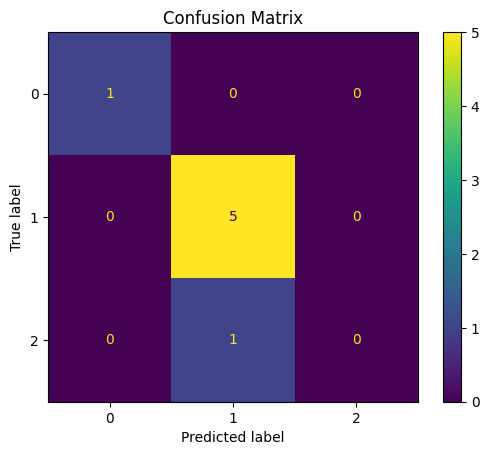

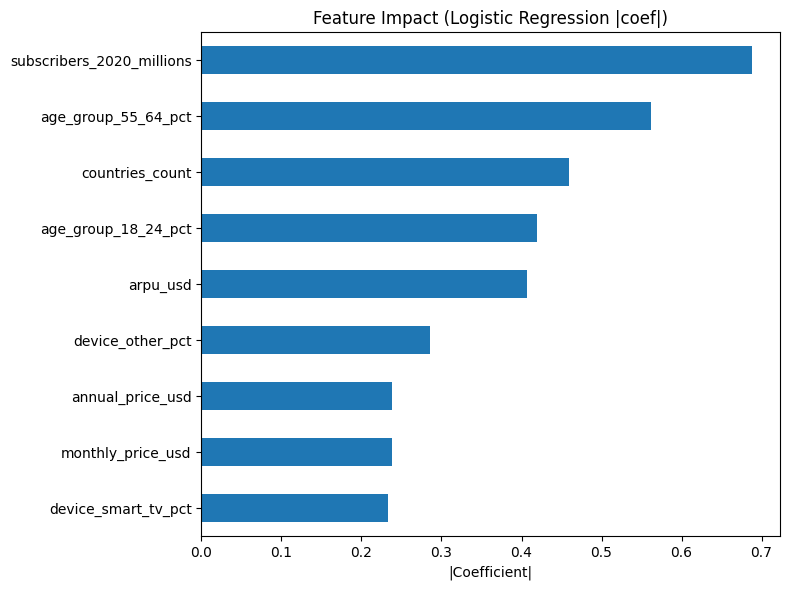

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = np.unique(np.concatenate([y_test, y_pred_lr]))
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lr_clf = lr.named_steps["clf"]
coef = lr_clf.coef_          # shape: (n_classes, n_features)
imp = np.mean(np.abs(coef), axis=0)

feat_imp = pd.Series(imp, index=feature_cols_1_LogisticRegression).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind="barh")
plt.title("Feature Impact (Logistic Regression |coef|)")
plt.xlabel("|Coefficient|")
plt.tight_layout()
plt.show()

In [60]:
# ==================== Accuracy: 100.00% ====================
# feature_cols_1_RandomForestClassifier = [
#        'monthly_price_usd', 'annual_price_usd',
#        'subscribers_millions','age_group_18_24_pct', 'age_group_25_34_pct',
#        'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
#        'age_group_65_plus_pct',
#        'device_smart_tv_pct', 'device_gaming_console_pct',
#        'device_other_pct', 'arpu_usd', 'churn_rate_pct',
#        'subscribers_2020_millions', 'subscribers_2021_millions',
#        'subscribers_2022_millions', 'subscribers_2023_millions',
#        'subscribers_2024_millions', 'countries_count']

# ==================== Accuracy: 100.00% ====================
feature_cols_1_RandomForestClassifier = [
       'subscribers_millions',
      #  'age_group_18_24_pct',
      #  'age_group_55_64_pct',
      #  'device_gaming_console_pct',
      #  'churn_rate_pct',
       'subscribers_2020_millions',
       'subscribers_2021_millions',
       'subscribers_2022_millions',
       'subscribers_2023_millions',
       'subscribers_2024_millions'
       ]

In [61]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y = df_encoded_2["engagement_cluster"]
# X = df_encoded_2[feature_cols_1]
X = df_encoded_2[feature_cols_1_RandomForestClassifier]
# ==============================================================
# 切訓練 / 測試集（stratify 讓比例一致）
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# ==============================================================
# 模型 2： Random Forest
# ==============================================================
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    min_samples_leaf=2
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\n==================== Random Forest ====================")
print(f"Accuracy: {acc_rf*100:.2f}%")
print("pred unique:", np.unique(y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf, labels=[0, 1, 2]))
print(classification_report(y_test, y_pred_rf, labels=[0, 1, 2], zero_division=0))
# ==============================================================
#  Random Forest 特徵相關
# ==============================================================
rf_importance = pd.Series(
    rf.feature_importances_,
    # index=feature_cols_1
    index=feature_cols_1_RandomForestClassifier
).sort_values(ascending=False)

print("=== Random Forest feature importance ===")
print(rf_importance)


==================== Random Forest ====================
Accuracy: 100.00%
pred unique: [0 1 2]
[[1 0 0]
 [0 5 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

=== Random Forest feature importance ===
subscribers_2023_millions    0.183688
subscribers_2020_millions    0.177779
subscribers_millions         0.171384
subscribers_2021_millions    0.167702
subscribers_2022_millions    0.161805
subscribers_2024_millions    0.137642
dtype: float64


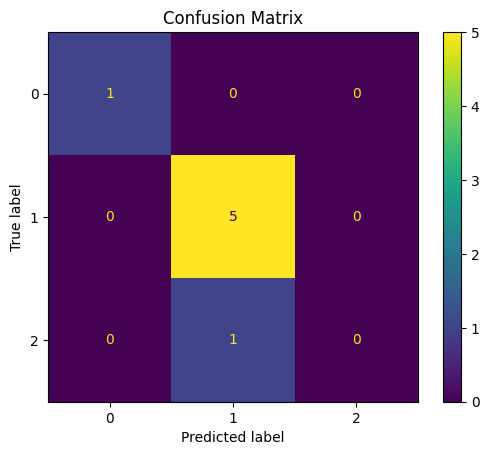

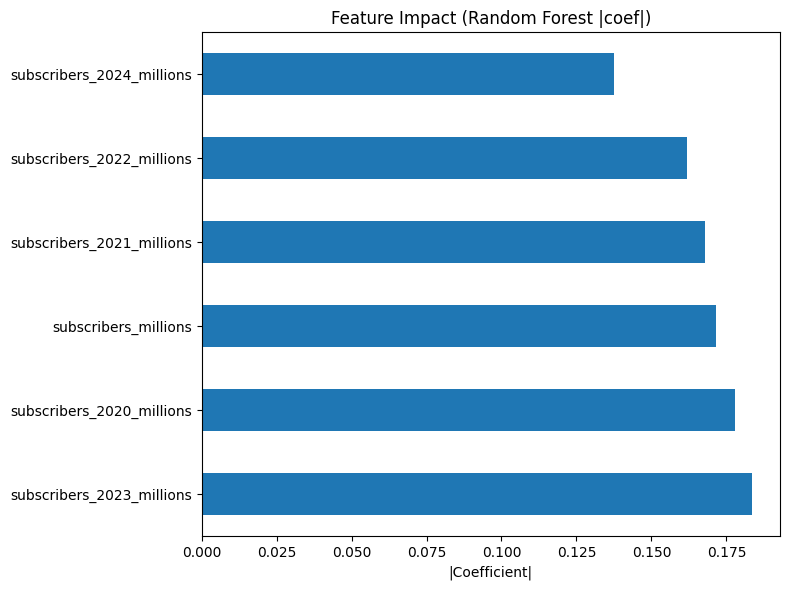

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = np.unique(np.concatenate([y_test, y_pred_rf]))
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_importance = pd.Series(
    rf.feature_importances_,
    # index=feature_cols_1
    index=feature_cols_1_RandomForestClassifier
).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
rf_importance.plot(kind="barh")
plt.title("Feature Impact (Random Forest |coef|)")
plt.xlabel("|Coefficient|")
plt.tight_layout()
plt.show()

In [37]:
print(df_encoded_3.columns)

Index(['service_name', 'type', 'category', 'countries_available',
       'monthly_price_usd', 'annual_price_usd', 'launch_year',
       'subscribers_millions', 'content_type', 'platforms', 'is_free',
       'parent_company', 'age_group_18_24_pct', 'age_group_25_34_pct',
       'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
       'age_group_65_plus_pct', 'device_android_pct', 'device_ios_pct',
       'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct', 'engagement_cluster', 'arpu_usd', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions', 'countries_count', 'content_type_count',
       'platforms_gaming_consoles', 'platforms_mobile', 'platforms_smart_tv',
       'platforms_web'],
      dtype='object')


In [38]:
feature_cols_2 = ['type', 'category',
       'monthly_price_usd', 'annual_price_usd', 'launch_year',
       'subscribers_millions', 'is_free',
       'age_group_18_24_pct', 'age_group_25_34_pct',
       'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct',
       'age_group_65_plus_pct', 'device_android_pct', 'device_ios_pct',
       'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct',
       'device_other_pct', 'arpu_usd', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions', 'countries_count', 'content_type_count',
       'platforms_gaming_consoles', 'platforms_mobile', 'platforms_smart_tv',
       'platforms_web']

In [39]:
# =========== Accuracy: 100.00% ===========
# feature_cols_2_LogisticRegression = [
#        'subscribers_millions', 'churn_rate_pct',
#        'subscribers_2021_millions',
#        'subscribers_2022_millions', 'subscribers_2023_millions',
#        'subscribers_2024_millions']

# =========== Accuracy: 100.00% ===========
feature_cols_2_LogisticRegression = [
       'subscribers_millions', 'churn_rate_pct',
       'subscribers_2020_millions', 'subscribers_2021_millions',
       'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions', 'content_type_count']

# =========== Accuracy: 93.75% ===========
# feature_cols_2_LogisticRegression = [
#        'subscribers_millions', 'device_gaming_console_pct', 'churn_rate_pct',
#        'subscribers_2020_millions', 'subscribers_2021_millions',
#        'subscribers_2022_millions', 'subscribers_2023_millions',
#        'subscribers_2024_millions', 'content_type_count']

In [40]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y = df_encoded_3["engagement_cluster"]
X = df_encoded_3[feature_cols_2_LogisticRegression]
# X = df_encoded_3[feature_cols_2]
# ==============================================================
# 切訓練 / 測試集（stratify 讓比例一致）
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# ==============================================================
#  模型 1：Logistic Regression
# ==============================================================
lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        solver="lbfgs"
        # ✅ 不要再寫 multi_class，避免 FutureWarning（原因下段解釋）
    ))
])

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("\n==================== Logistic Regression (balanced + scaled) ====================")
print(f"Accuracy: {acc_lr*100:.2f}%")
print("pred unique:", np.unique(y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr, labels=[0, 1, 2]))
print(classification_report(y_test, y_pred_lr, labels=[0, 1, 2], zero_division=0))
# ==============================================================
#  Logistic Regression 特徵相關
# ==============================================================
# 取出 Logistic Regression 本體（因為在 Pipeline 裡）
lr_clf = lr.named_steps["clf"]

coef = lr_clf.coef_   # shape: (3, n_features)

coef_df = pd.DataFrame(
    coef,
    columns=feature_cols_2_LogisticRegression,
    # columns=feature_cols_2,
    index=[f"class_{c}" for c in lr_clf.classes_]
)
print("==================== Logistic Regression coefficients ====================")
print(coef_df)
importance_lr = coef_df.abs().mean(axis=0).sort_values(ascending=False)
print("\n==================== Logistic Regression feature importance (mean |coef|) ====================")
print(importance_lr)


==================== Logistic Regression (balanced + scaled) ====================
Accuracy: 100.00%
pred unique: [0 1 2]
[[ 1  0  0]
 [ 0 12  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

==================== Logistic Regression coefficients ====================
         subscribers_millions  churn_rate_pct  subscribers_2020_millions  \
class_0              0.988716       -0.571551                   0.187443   
class_1             -1.125192       -0.144399                  -0.727853   
class_2              0.136476        0.715950                   0.540410   

         subscribers_2021_millions  subscribers_2022_millions  \
class_0        

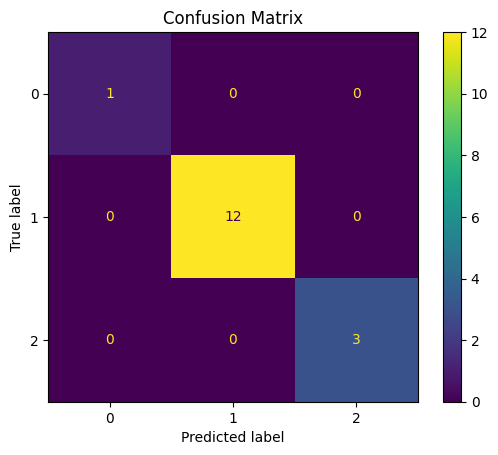

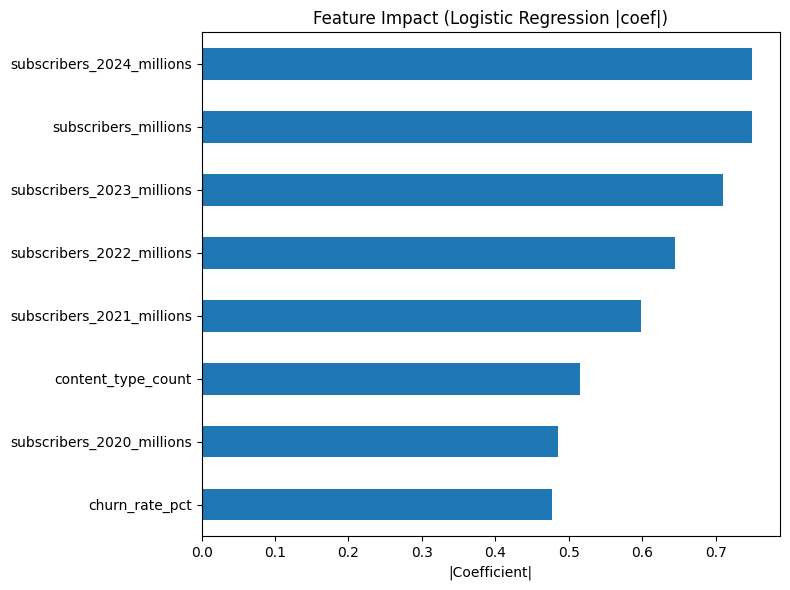

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = np.unique(np.concatenate([y_test, y_pred_lr]))
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lr_clf = lr.named_steps["clf"]
coef = lr_clf.coef_          # shape: (n_classes, n_features)
imp = np.mean(np.abs(coef), axis=0)

feat_imp = pd.Series(imp, index=feature_cols_2_LogisticRegression).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind="barh")
plt.title("Feature Impact (Logistic Regression |coef|)")
plt.xlabel("|Coefficient|")
plt.tight_layout()
plt.show()

In [42]:
# ==================== Accuracy: 93.75% ====================
# feature_cols_2_RandomForestClassifier = ['type', 'annual_price_usd',
#        'subscribers_millions', 'age_group_18_24_pct', 'age_group_25_34_pct',
#        'age_group_35_44_pct', 'age_group_45_54_pct', 'age_group_55_64_pct', 'device_android_pct', 'device_ios_pct',
#        'device_web_pct', 'device_smart_tv_pct', 'device_gaming_console_pct', 'arpu_usd', 'churn_rate_pct',
#        'subscribers_2020_millions', 'subscribers_2021_millions',
#        'subscribers_2022_millions', 'subscribers_2023_millions',
#        'subscribers_2024_millions', 'content_type_count']

# ==================== Accuracy: 93.75% ====================
# feature_cols_2_RandomForestClassifier = ['subscribers_millions',
#        'churn_rate_pct', 'subscribers_2020_millions', 'subscribers_2021_millions',
#        'subscribers_2022_millions', 'subscribers_2023_millions',
#        'subscribers_2024_millions', 'content_type_count']

# ==================== Accuracy: % ====================
feature_cols_2_RandomForestClassifier = ['subscribers_millions',
       'subscribers_2021_millions', 'subscribers_2022_millions', 'subscribers_2023_millions',
       'subscribers_2024_millions']

In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y = df_encoded_3["engagement_cluster"]
X = df_encoded_3[feature_cols_2_RandomForestClassifier]
# X = df_encoded_3[feature_cols_2]
# ==============================================================
# 切訓練 / 測試集（stratify 讓比例一致）
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# ==============================================================
# 模型 2： Random Forest
# ==============================================================
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    min_samples_leaf=2
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\n==================== Random Forest ====================")
print(f"Accuracy: {acc_rf*100:.2f}%")
print("pred unique:", np.unique(y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf, labels=[0, 1, 2]))
print(classification_report(y_test, y_pred_rf, labels=[0, 1, 2], zero_division=0))
# ==============================================================
#  Random Forest 特徵相關
# ==============================================================
rf_importance = pd.Series(
    rf.feature_importances_,
    # index=feature_cols_2
    index=feature_cols_2_RandomForestClassifier
).sort_values(ascending=False)

print("=== Random Forest feature importance ===")
print(rf_importance)


==================== Random Forest ====================
Accuracy: 93.75%
pred unique: [0 1 2]
[[ 1  0  0]
 [ 0 12  0]
 [ 1  0  2]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00        12
           2       1.00      0.67      0.80         3

    accuracy                           0.94        16
   macro avg       0.83      0.89      0.82        16
weighted avg       0.97      0.94      0.94        16

=== Random Forest feature importance ===
subscribers_2023_millions    0.224245
subscribers_2021_millions    0.203398
subscribers_2022_millions    0.193589
subscribers_millions         0.190281
subscribers_2024_millions    0.188487
dtype: float64


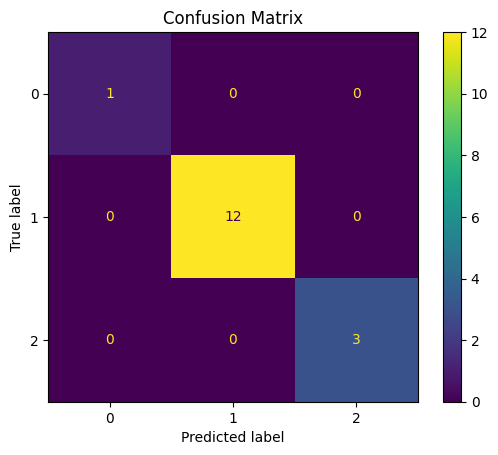

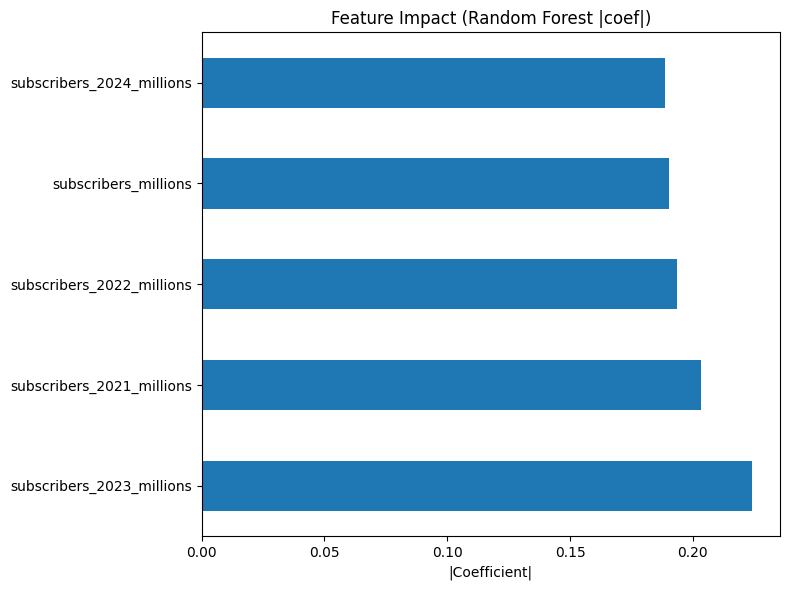

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = np.unique(np.concatenate([y_test, y_pred_rf]))
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_importance = pd.Series(
    rf.feature_importances_,
    # index=feature_cols_1
    index=feature_cols_2_RandomForestClassifier
).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
rf_importance.plot(kind="barh")
plt.title("Feature Impact (Random Forest |coef|)")
plt.xlabel("|Coefficient|")
plt.tight_layout()
plt.show()

In [67]:
cols = ['subscribers_2020_millions', 'subscribers_millions','subscribers_2021_millions',
        'subscribers_2022_millions', 'subscribers_2023_millions',
        'subscribers_2024_millions']
# 1     Low Engagement
print(df_encoded_3.loc[df_encoded_3["engagement_cluster"] == 1, cols])

    subscribers_2020_millions  subscribers_millions  \
21                   0.033378              0.059682   
22                   0.059540              0.059682   
23                   0.049617              0.049735   
24                   0.027515              0.049735   
25                   0.022102              0.039788   
26                   0.039693              0.039788   
27                   0.005413              0.038130   
28                   0.029770              0.029841   
29                   0.015787              0.028183   
30                   0.027966              0.028183   
31                   0.000000              0.024867   
32                   0.015336              0.019894   
33                   0.015336              0.019894   
34                   0.010374              0.018236   
35                   0.009021              0.016578   
36                   0.009021              0.015915   
37                   0.001804              0.011605   
38        

In [69]:
cols = ['subscribers_2020_millions', 'subscribers_millions','subscribers_2021_millions',
        'subscribers_2022_millions', 'subscribers_2023_millions',
        'subscribers_2024_millions']
# 2  Medium Engagement
print(df_encoded_3.loc[df_encoded_3["engagement_cluster"] == 2, cols])

    subscribers_2020_millions  subscribers_millions  \
8                    0.258006              0.331565   
9                    0.219215              0.281830   
10                   0.000000              0.256963   
11                   0.159675              0.205570   
12                   0.166441              0.166446   
13                   0.015336              0.112732   
14                   0.082544              0.106101   
15                   0.052774              0.094496   
16                   0.092918              0.092838   
17                   0.067208              0.086207   
18                   0.046008              0.082891   
19                   0.011276              0.082891   
20                   0.064502              0.082891   

    subscribers_2021_millions  subscribers_2022_millions  \
8                    0.274854                   0.292343   
9                    0.233500                   0.248647   
10                   0.032581                   0

In [70]:
cols = ['subscribers_2020_millions', 'subscribers_millions','subscribers_2021_millions',
        'subscribers_2022_millions', 'subscribers_2023_millions',
        'subscribers_2024_millions']
# 0    High Engagement
print(df_encoded_3.loc[df_encoded_3["engagement_cluster"] == 0, cols])

   subscribers_2020_millions  subscribers_millions  subscribers_2021_millions  \
0                   1.000000              1.000000                   1.000000   
1                   0.729364              0.729443                   0.729323   
2                   0.243121              0.436340                   0.281537   
3                   0.057736              0.424403                   0.273601   
4                   0.414524              0.414456                   0.414369   
5                   0.221922              0.397878                   0.256475   
6                   0.309427              0.397878                   0.398079   
7                   0.348218              0.348143                   0.348371   

   subscribers_2022_millions  subscribers_2023_millions  \
0                   1.000000                   1.000000   
1                   0.729312                   0.729323   
2                   0.325599                   0.377014   
3                   0.316705      

# **ML(非監督式學習)**

**題目:串流平台的客群以及定位分析**

In [72]:
df_un_2 = df_encoded_2
df_un_3 = df_encoded_3

In [73]:
# ===============================
# 分群特徵（純行為）
# ===============================
# cluster_features = [
#     # 年齡結構
#     "age_group_18_24_pct", "age_group_25_34_pct", "age_group_35_44_pct",
#     "age_group_45_54_pct", "age_group_55_64_pct", "age_group_65_plus_pct",

#     # 裝置使用
#     "device_android_pct", "device_ios_pct", "device_web_pct",
#     "device_smart_tv_pct", "device_gaming_console_pct", "device_other_pct"
# ]

cluster_features_2 = [
    # 年齡結構
    "age_group_18_24_pct", "age_group_25_34_pct", "age_group_35_44_pct",
    "age_group_45_54_pct", "age_group_55_64_pct",

    # 裝置使用
    "device_android_pct", "device_ios_pct", "device_web_pct",
    "device_smart_tv_pct"
]

In [74]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_cluster = df_un_2[cluster_features_2]
# ===============================
# 嘗試不同群數
# ===============================
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")
# ===============================
# 選定群數（例：k=3）
# ===============================
kmeans = KMeans(n_clusters=3, random_state=42)
df_un_2["behavior_cluster"] = kmeans.fit_predict(X_cluster)
# ===============================
# 查看各群特徵平均
# ===============================
cluster_summary = df_un_2.groupby("behavior_cluster")[cluster_features_2].mean()
print(cluster_summary)

k=2, Silhouette Score=0.078
k=3, Silhouette Score=0.122
k=4, Silhouette Score=0.127
k=5, Silhouette Score=0.111
k=6, Silhouette Score=0.106
                  age_group_18_24_pct  age_group_25_34_pct  \
behavior_cluster                                             
0                            0.117500             0.258833   
1                            0.189364             0.296091   
2                            0.163778             0.275111   

                  age_group_35_44_pct  age_group_45_54_pct  \
behavior_cluster                                             
0                            0.206500             0.198000   
1                            0.247273             0.153636   
2                            0.188778             0.171000   

                  age_group_55_64_pct  device_android_pct  device_ios_pct  \
behavior_cluster                                                            
0                            0.108333            0.364167        0.267333   
1      

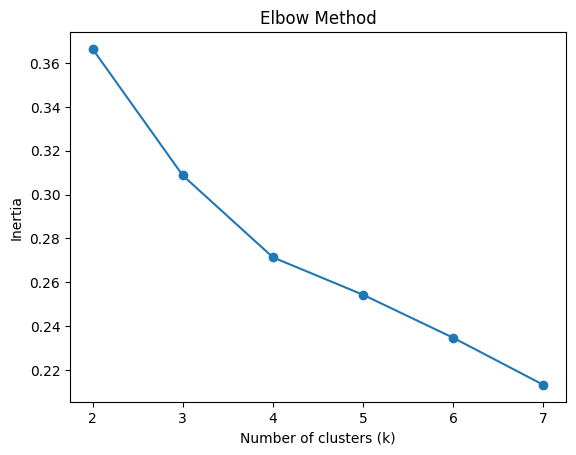

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

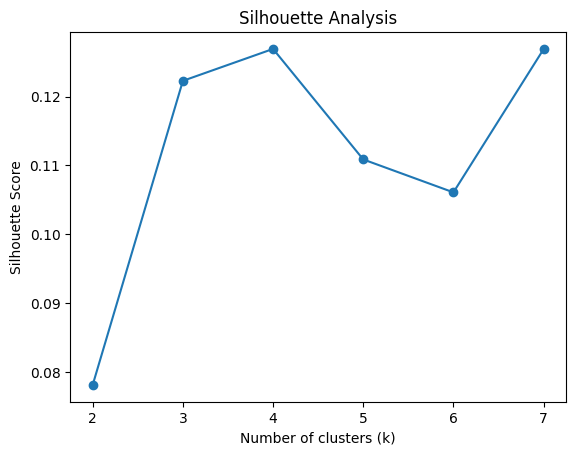

In [76]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    scores.append(score)

plt.figure()
plt.plot(range(2, 8), scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

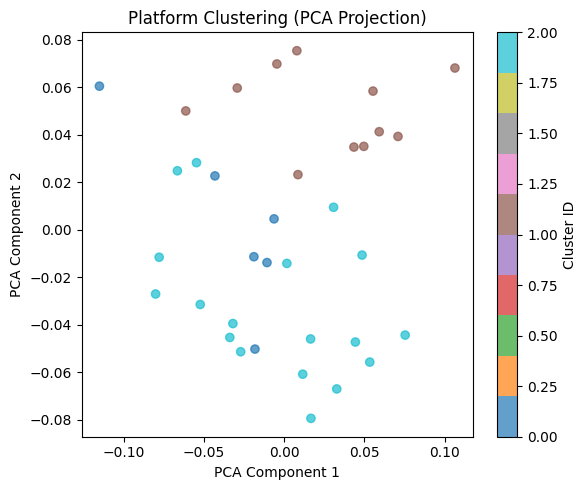

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df_un_2["behavior_cluster"],
    cmap="tab10",
    alpha=0.7
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Platform Clustering (PCA Projection)")
plt.colorbar(scatter, label="Cluster ID")
plt.tight_layout()
plt.show()

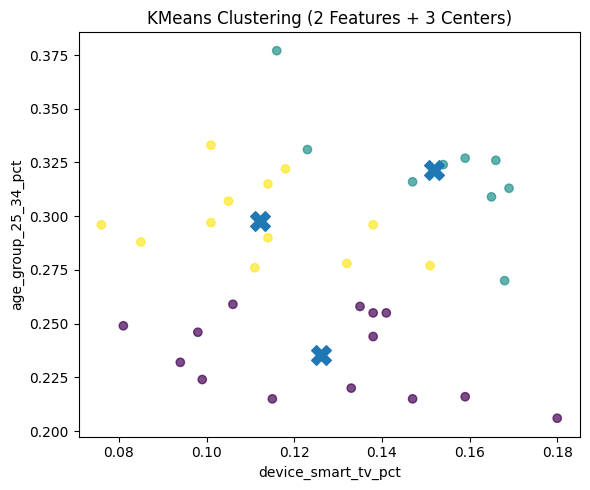

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# cluster_features_2 = [
#     # 年齡結構
#     "age_group_18_24_pct", "age_group_25_34_pct", "age_group_35_44_pct",
#     "age_group_45_54_pct", "age_group_55_64_pct",

#     # 裝置使用
#     "device_android_pct", "device_ios_pct", "device_web_pct",
#     "device_smart_tv_pct"
# ]

# 你自己挑 2 個特徵（這裡舉例）
f1 = "device_smart_tv_pct"
f2 = "age_group_25_34_pct"

X2 = df_un_2[[f1, f2]]

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X2)
centers = kmeans.cluster_centers_  # shape: (3,2)

plt.figure(figsize=(6, 5))
plt.scatter(X2[f1], X2[f2], c=labels, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200)  # 三個中心點
plt.xlabel(f1)
plt.ylabel(f2)
plt.title("KMeans Clustering (2 Features + 3 Centers)")
plt.tight_layout()
plt.show()

In [86]:
print(df_un_2.loc[df_un_2["behavior_cluster"] == 0, cluster_features_2])


    age_group_18_24_pct  age_group_25_34_pct  age_group_35_44_pct  \
1                 0.139                0.327                0.164   
12                0.129                0.258                0.181   
13                0.140                0.224                0.232   
15                0.081                0.313                0.212   
16                0.110                0.215                0.220   
17                0.106                0.216                0.230   

    age_group_45_54_pct  age_group_55_64_pct  device_android_pct  \
1                 0.185                0.100               0.353   
12                0.214                0.132               0.297   
13                0.242                0.085               0.362   
15                0.235                0.096               0.429   
16                0.148                0.119               0.386   
17                0.164                0.118               0.358   

    device_ios_pct  device_web_pct  dev

In [82]:
print(df_un_2.loc[df_un_2["behavior_cluster"] == 1, cluster_features_2])

    age_group_18_24_pct  age_group_25_34_pct  age_group_35_44_pct  \
0                 0.203                0.316                0.231   
5                 0.120                0.324                0.217   
8                 0.190                0.296                0.202   
10                0.226                0.297                0.254   
14                0.219                0.322                0.267   
22                0.190                0.309                0.278   
23                0.193                0.232                0.229   
25                0.229                0.246                0.280   
27                0.130                0.277                0.282   
32                0.155                0.331                0.229   
34                0.228                0.307                0.251   

    age_group_45_54_pct  age_group_55_64_pct  device_android_pct  \
0                 0.180                0.098               0.377   
5                 0.141            

In [83]:
print(df_un_2.loc[df_un_2["behavior_cluster"] == 2, cluster_features_2])

    age_group_18_24_pct  age_group_25_34_pct  age_group_35_44_pct  \
2                 0.212                0.276                0.193   
3                 0.156                0.296                0.182   
4                 0.119                0.333                0.213   
6                 0.201                0.244                0.193   
7                 0.196                0.220                0.167   
9                 0.225                0.278                0.196   
11                0.177                0.206                0.174   
18                0.133                0.255                0.187   
19                0.179                0.215                0.218   
20                0.107                0.270                0.216   
21                0.208                0.255                0.213   
24                0.205                0.288                0.166   
26                0.095                0.259                0.159   
28                0.087           

In [87]:
result = (df_un_2
          .groupby("behavior_cluster")[cluster_features_2]
          .agg(["min", "max"]))

print(result)

                 age_group_18_24_pct        age_group_25_34_pct         \
                                 min    max                 min    max   
behavior_cluster                                                         
0                              0.081  0.140               0.215  0.327   
1                              0.120  0.229               0.232  0.331   
2                              0.087  0.225               0.206  0.377   

                 age_group_35_44_pct        age_group_45_54_pct         \
                                 min    max                 min    max   
behavior_cluster                                                         
0                              0.164  0.232               0.148  0.242   
1                              0.202  0.282               0.099  0.214   
2                              0.159  0.218               0.109  0.252   

                 age_group_55_64_pct        device_android_pct         \
                                 min 

In [52]:
# ===============================
# 分群特徵（純行為）
# ===============================
cluster_features_3 = [
    # 年齡結構
    "age_group_18_24_pct", "age_group_25_34_pct", "age_group_35_44_pct",
    "age_group_45_54_pct", "age_group_55_64_pct",

    # 裝置使用
    "device_android_pct", "device_ios_pct", "device_web_pct",
    "device_smart_tv_pct"
]

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_cluster = df_un_3[cluster_features_3]
# ===============================
# 嘗試不同群數
# ===============================
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")
# ===============================
# 選定群數（例：k=3）
# ===============================
kmeans = KMeans(n_clusters=3, random_state=42)
df_un_3["behavior_cluster"] = kmeans.fit_predict(X_cluster)
# ===============================
# 查看各群特徵平均
# ===============================
cluster_summary = df_un_3.groupby("behavior_cluster")[cluster_features_3].mean()
print(cluster_summary)

k=2, Silhouette Score=0.130
k=3, Silhouette Score=0.128
k=4, Silhouette Score=0.105
k=5, Silhouette Score=0.108
k=6, Silhouette Score=0.086
                  age_group_18_24_pct  age_group_25_34_pct  \
behavior_cluster                                             
0                            0.191424             0.266818   
1                            0.186158             0.300421   
2                            0.117346             0.289154   

                  age_group_35_44_pct  age_group_45_54_pct  \
behavior_cluster                                             
0                            0.226212             0.166879   
1                            0.234000             0.222789   
2                            0.214923             0.159462   

                  age_group_55_64_pct  device_android_pct  device_ios_pct  \
behavior_cluster                                                            
0                            0.106212            0.333030        0.252333   
1      

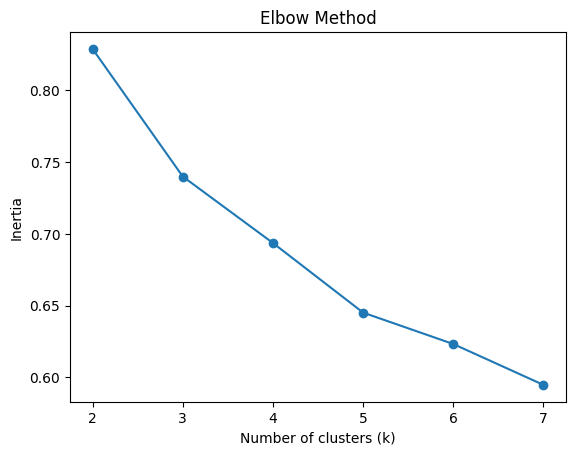

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

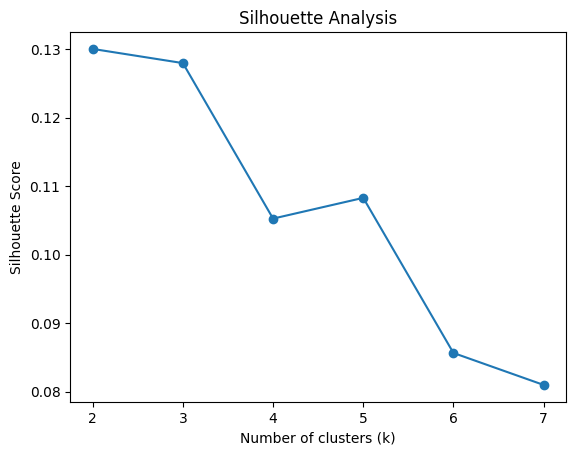

In [55]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    scores.append(score)

plt.figure()
plt.plot(range(2, 8), scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

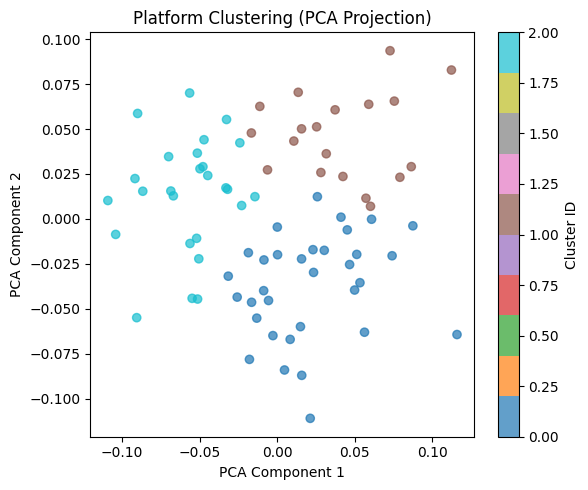

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df_un_3["behavior_cluster"],
    cmap="tab10",
    alpha=0.7
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Platform Clustering (PCA Projection)")
plt.colorbar(scatter, label="Cluster ID")
plt.tight_layout()
plt.show()

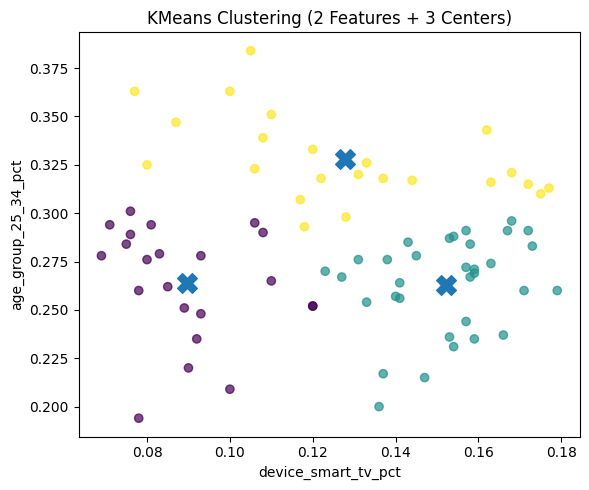

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# cluster_features_3 = [
#     # 年齡結構
#     "age_group_18_24_pct", "age_group_25_34_pct", "age_group_35_44_pct",
#     "age_group_45_54_pct", "age_group_55_64_pct",

#     # 裝置使用
#     "device_android_pct", "device_ios_pct", "device_web_pct",
#     "device_smart_tv_pct"
# ]

# 你自己挑 2 個特徵（這裡舉例）
f1 = "device_smart_tv_pct"
f2 = "age_group_25_34_pct"

X2 = df_un_3[[f1, f2]]

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X2)
centers = kmeans.cluster_centers_  # shape: (3,2)

plt.figure(figsize=(6, 5))
plt.scatter(X2[f1], X2[f2], c=labels, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200)  # 三個中心點
plt.xlabel(f1)
plt.ylabel(f2)
plt.title("KMeans Clustering (2 Features + 3 Centers)")
plt.tight_layout()
plt.show()